In [70]:
!pip install seaborn plotly pandas numpy matplotlib


In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import textwrap

In [72]:
# Enlace al archivo CSV en repositorio
url = 'https://raw.githubusercontent.com/lfot/Py_DDS_trabajo_final/main/data/df_ok.csv'

# Leer el DataFrame desde el archivo CSV desde repositorio
df_ok = pd.read_csv(url, sep=';')

**Tablas de frecuencia y descriptivos**

Incluye ajustes para ordenar categorías de variables específicas, considerando el nombre de las mismas que comienzan por número y las reconoce como un texto.

In [73]:
# Obtener todas las columnas del df
variables = df_ok.columns.tolist()

# Definir el orden personalizado para algunas variables específicas
order_dict = {
    'iden_pol_2': [
        '1.- Izquierda', '2', '3', '4', '5', 
        '6', '7', '8', '9', '10.- Derecha', 
        'NaN'
    ],
    'eval_gob_1': [
        '1. - APRUEBA', '2. - DESAPRUEBA', 
        '3. - (no leer) NO APRUEBA NI DESAPRUEBA', 'NaN'
    ],
    'democracia_19': [
        '1.- Que haya libertades públicas y privadas', 
        '2', '3', '4', '5', '6', '7', '8', 
        '9', '10.- Que haya orden público y seguridad ciudadana', 
        'NaN'
    ],
    'constitucion_4_b': [
        '1.- APRUEBO', '2.- RECHAZO', 
        '3.- VOTÉ BLANCO (no leer)', '4.- VOTÉ NULO (no leer)', 
        'NaN'
    ],
    'constitucion_4_a': [
        'Si', 'No', 'NaN'
    ]
}

# Calcular tablas de frecuencia para cada variable categórica
for var in variables:
    # Verificar si la variable es categórica o cuantitativa
    if df_ok[var].dtype == 'object' or df_ok[var].dtype.name == 'category':
        # Calcular frecuencia absoluta
        freq_abs = df_ok[var].value_counts(dropna=False)
        
        # Calcular frecuencia relativa como porcentaje
        freq_rel = df_ok[var].value_counts(normalize=True, dropna=False) * 100
        
        # Crear un DataFrame con las frecuencias
        freq_df = pd.DataFrame({
            'Frecuencia': freq_abs,
            'Porcentaje': freq_rel
        }).reset_index()
        
        # Renombrar columnas
        freq_df.columns = [var, 'Frecuencia', 'Porcentaje']
        
        # Ordenar el df según el orden personalizado cuendo se indica
        if var in order_dict:
            order = order_dict[var]
            freq_df[var] = pd.Categorical(freq_df[var], categories=order, ordered=True)
            freq_df = freq_df.sort_values(by=var)
        else:
            # Ordenar en orden ascendente para variables con menos de 9 categorías
            freq_df = freq_df.sort_values(by=var, ascending=True)
        
        # Resetear el índice
        freq_df = freq_df.reset_index(drop=True)
        
        # Imprimir resultados
        print(f"\nTabla de Frecuencia para {var}:\n")
        print(freq_df)

# Análisis descriptivo básico de las variables cuantitativas
for var in variables:
    if pd.api.types.is_numeric_dtype(df_ok[var]):
        # Análisis descriptivo de la variable
        edad_desc = df_ok[var].describe(include='all')
        
        # Agregar conteo de NaN
        nan_count = df_ok[var].isna().sum()
        
        # Crear un df para el análisis descriptivo
        edad_desc_df = pd.DataFrame(edad_desc).T
        edad_desc_df['count_NaN'] = nan_count
        
        # Imprimir análisis descriptivo
        print(f"\nAnálisis Descriptivo para '{var}':\n")
        print(edad_desc_df)



Tabla de Frecuencia para zona_u_r:

  zona_u_r  Frecuencia  Porcentaje
0    RURAL         182   12.612613
1   URBANA        1261   87.387387

Tabla de Frecuencia para eval_gob_1:

                                eval_gob_1  Frecuencia  Porcentaje
0                             1. - APRUEBA         254   17.602218
1                          2. - DESAPRUEBA         933   64.656965
2  3. - (no leer) NO APRUEBA NI DESAPRUEBA         202   13.998614
3                                      NaN          54    3.742204

Tabla de Frecuencia para iden_pol_2:

       iden_pol_2  Frecuencia  Porcentaje
0   1.- Izquierda          71    4.920305
1               2          27    1.871102
2               3          70    4.851005
3               4          67    4.643105
4               5         383   26.541927
5               6         104    7.207207
6               7          61    4.227304
7               8          58    4.019404
8               9          14    0.970201
9    10.- Derecha        

**Graficos déscriptivos** 

Incluye ajustes para ordenar categorías de variables específicas, considerando el nombre de las mismas que comienzan por número y las reconoce como un texto).

Se estandarizan los gráficos de barras, para que consideren una escala al 100% del recuento total.

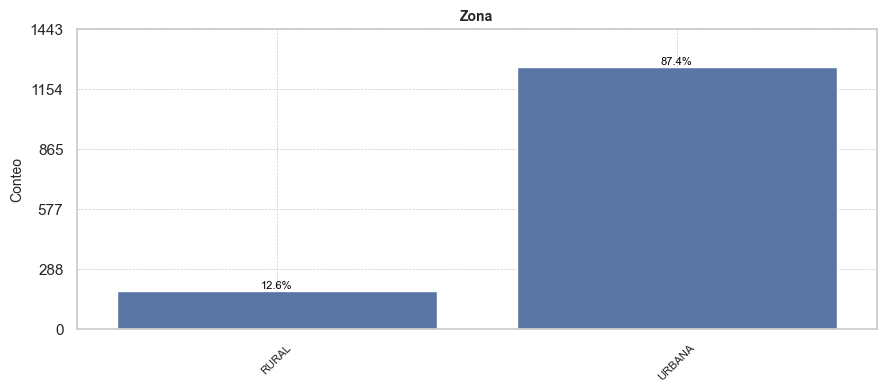

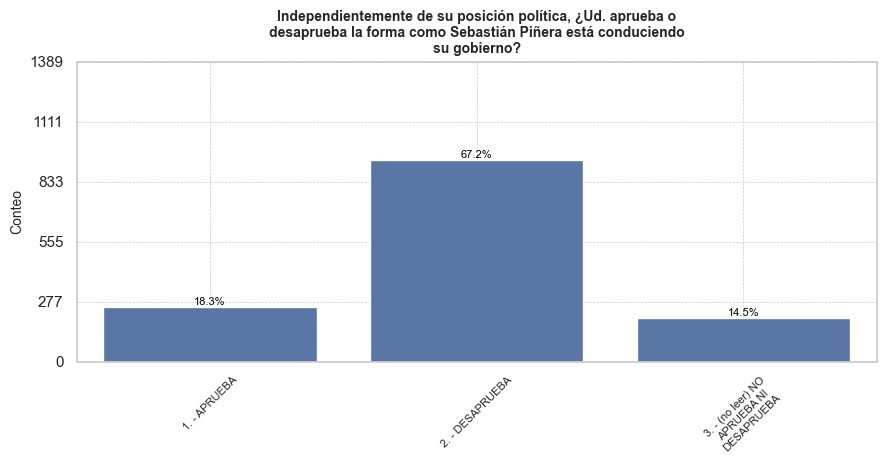

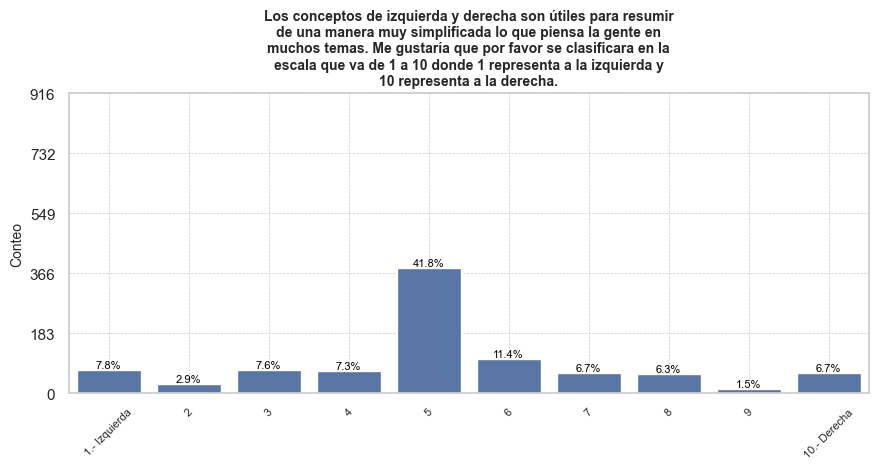

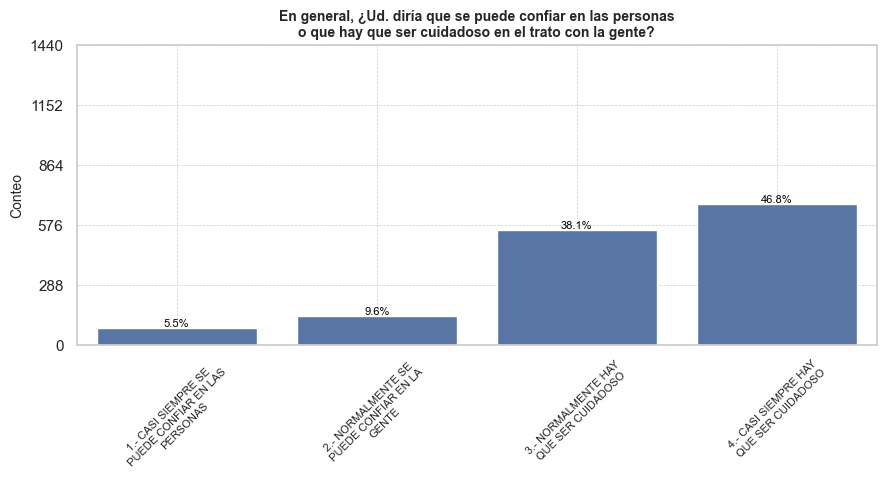

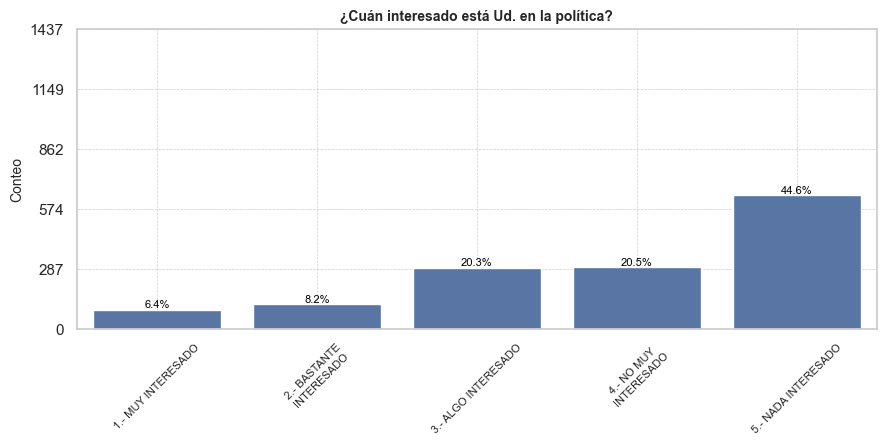

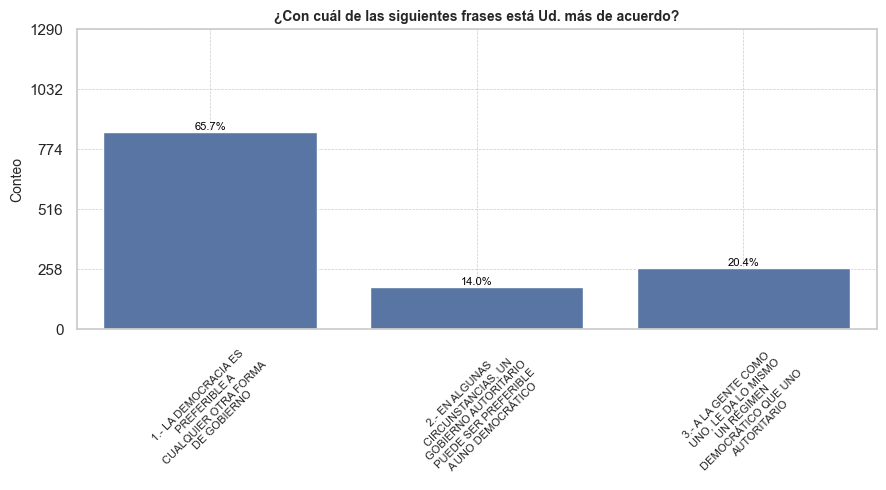

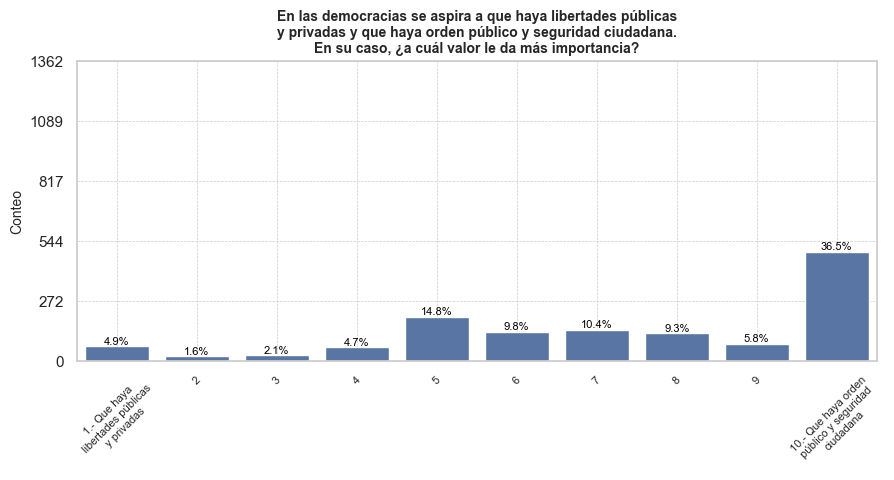

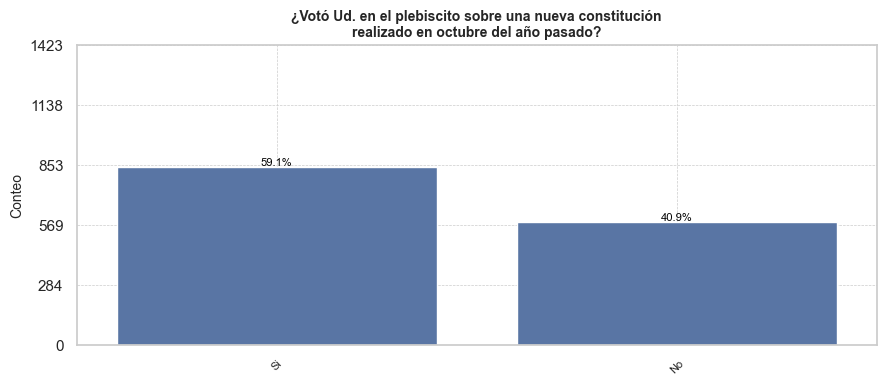

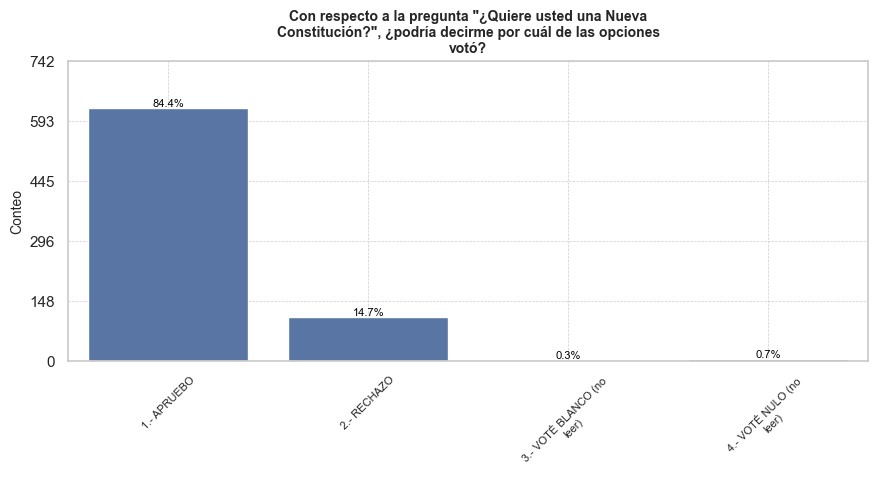

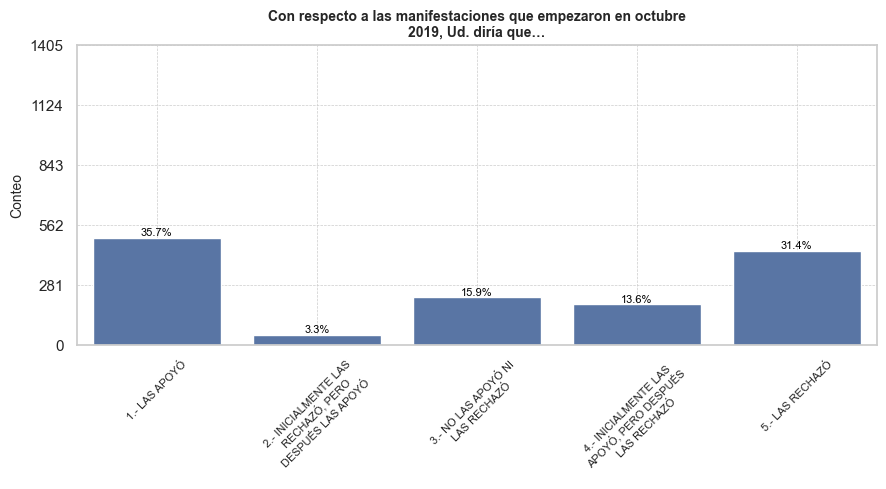

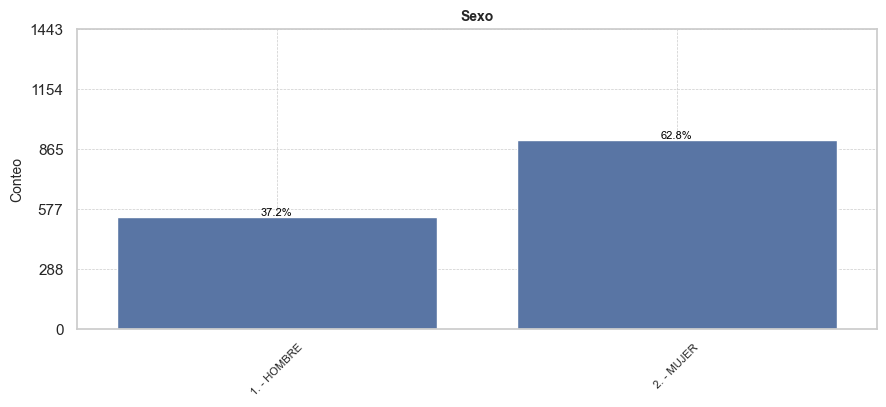

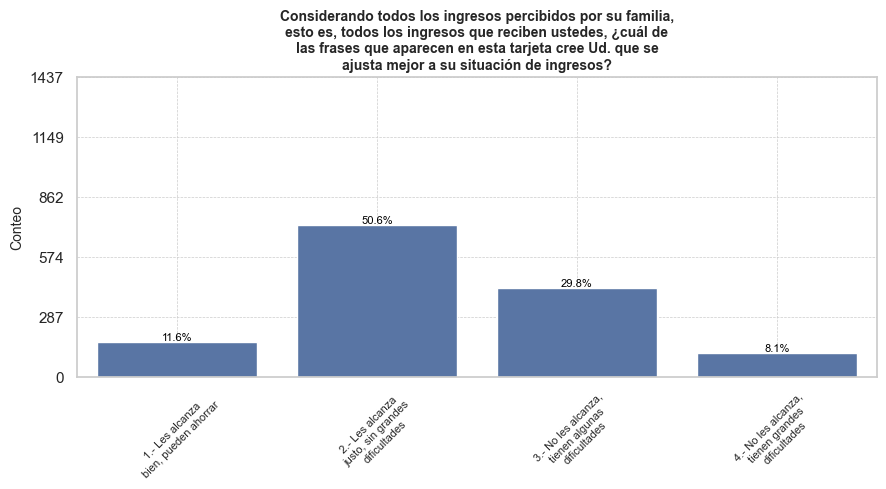

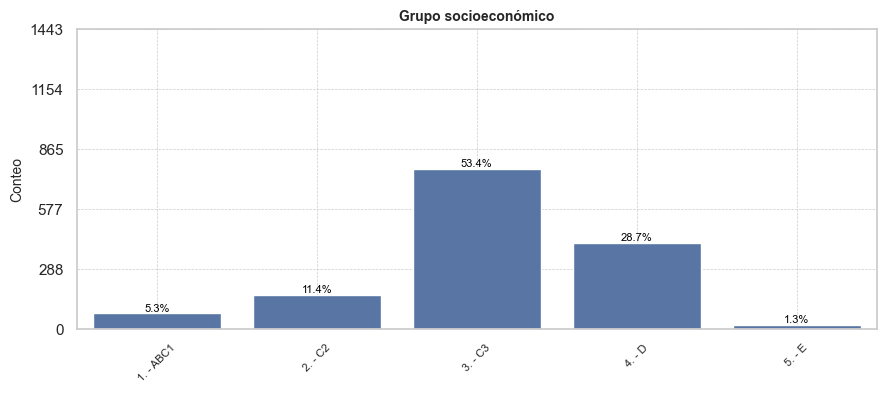

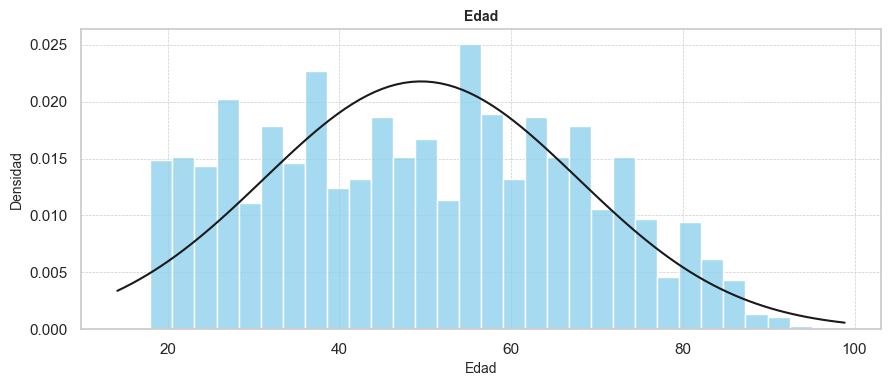

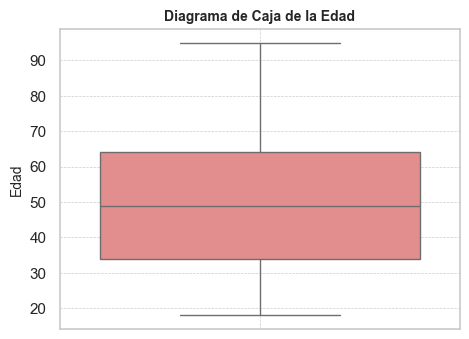

In [74]:
# Descripciones para títulos las variables
titles = {
    'zona_u_r': 'Zona',
    'eval_gob_1': 'Independientemente de su posición política, ¿Ud. aprueba o desaprueba la forma como Sebastián Piñera está conduciendo su gobierno?',
    'iden_pol_2': 'Los conceptos de izquierda y derecha son útiles para resumir de una manera muy simplificada lo que piensa la gente en muchos temas. Me gustaría que por favor se clasificara en la escala que va de 1 a 10 donde 1 representa a la izquierda y 10 representa a la derecha.',
    'confianza_8_a': 'En general, ¿Ud. diría que se puede confiar en las personas o que hay que ser cuidadoso en el trato con la gente?',
    'interes_pol_1_b': '¿Cuán interesado está Ud. en la política?',
    'democracia_21': '¿Con cuál de las siguientes frases está Ud. más de acuerdo?',
    'democracia_19': 'En las democracias se aspira a que haya libertades públicas y privadas y que haya orden público y seguridad ciudadana. En su caso, ¿a cuál valor le da más importancia?',
    'constitucion_4_a': '¿Votó Ud. en el plebiscito sobre una nueva constitución realizado en octubre del año pasado?',
    'constitucion_4_b': 'Con respecto a la pregunta "¿Quiere usted una Nueva Constitución?", ¿podría decirme por cuál de las opciones votó?',
    'estallido_5': 'Con respecto a las manifestaciones que empezaron en octubre 2019, Ud. diría que…',
    'sexo': 'Sexo',
    'edad': 'Edad',
    'bienestar_21': 'Considerando todos los ingresos percibidos por su familia, esto es, todos los ingresos que reciben ustedes, ¿cuál de las frases que aparecen en esta tarjeta cree Ud. que se ajusta mejor a su situación de ingresos?',
    'gse': 'Grupo socioeconómico'
}

# Orden personalizado para algunas variables específicas
order_dict = {
    'iden_pol_2': [
        '1.- Izquierda', '2', '3', '4', '5', 
        '6', '7', '8', '9', '10.- Derecha', 
        'NaN'
    ],
    'eval_gob_1': [
        '1. - APRUEBA', '2. - DESAPRUEBA', 
        '3. - (no leer) NO APRUEBA NI DESAPRUEBA', 'NaN'
    ],
    'democracia_19': [
        '1.- Que haya libertades públicas y privadas', 
        '2', '3', '4', '5', '6', '7', '8', 
        '9', '10.- Que haya orden público y seguridad ciudadana', 
        'NaN'
    ],
    'constitucion_4_b': [
        '1.- APRUEBO', '2.- RECHAZO', 
        '3.- VOTÉ BLANCO (no leer)', '4.- VOTÉ NULO (no leer)', 
        'NaN'
    ],
    'constitucion_4_a': [
        'Si', 'No', 'NaN'
    ]
}

# Función para ajustar el título largo descriptivo
def wrap_title(title, width=60):
    return '\n'.join(textwrap.wrap(title, width=width))

# Función para ajustar las etiquetas del eje x
def adjust_xticks(ax, rotation=45, fontsize=8):
    labels = [label.get_text() for label in ax.get_xticklabels()]
    wrapped_labels = [textwrap.fill(label, width=20) for label in labels]
    ax.set_xticks(range(len(wrapped_labels)))
    ax.set_xticklabels(wrapped_labels, rotation=rotation, fontsize=fontsize)

# Lista de variables para gráficos
variables_categoricas = [
    'zona_u_r', 'eval_gob_1', 'iden_pol_2', 'confianza_8_a', 
    'interes_pol_1_b', 'democracia_21', 'democracia_19', 
    'constitucion_4_a', 'constitucion_4_b', 'estallido_5', 
    'sexo', 'bienestar_21', 'gse'
]

# Categorías a excluir
exclude_categories = ['NaN']

# Aplicar un estilo a los gráficos
sns.set(style="whitegrid")

# Graficar variables categóricas con porcentajes
for var in variables_categoricas:
    plt.figure(figsize=(10, 5))
    
    # Definir el orden para la variable si se proporciona
    if var in order_dict:
        order = order_dict[var]
    else:
        # Ordenar alfabéticamente y filtrar categorías vacías
        order = sorted(df_ok[var].dropna().unique())
    
    # Filtrar categorías a excluir
    order = [cat for cat in order if cat not in exclude_categories]
    
    # Calcular los porcentajes
    total_count = df_ok[var].count()  # Total de valores no nulos
    counts = df_ok[var].value_counts(normalize=True).mul(100).reindex(order)

    # Graficar barras
    ax = sns.countplot(data=df_ok, x=var, order=order, hue=None)
    plt.title(wrap_title(titles[var]), fontsize=10, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Conteo', fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.5)
    
    # Ajustar la escala y las etiquetas del eje y
    y_labels = [f'{int(x)}' for x in np.linspace(0, total_count, num=6)]
    ax.set_yticks(np.linspace(0, total_count, num=6))
    ax.set_yticklabels(y_labels)
    adjust_xticks(ax, rotation=45, fontsize=8)
    
    # Añadir etiquetas de porcentaje en cada barra
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8, color='black', rotation=0)

    plt.subplots_adjust(left=0.1, right=0.9, top=0.8, bottom=0.2)  # Ajustar márgenes
    plt.show()

# Graficar variable 'edad' si es cuantitativa
plt.figure(figsize=(10, 5))

# Histograma
sns.histplot(df_ok['edad'], bins=30, kde=False, color='skyblue', stat='density')

# Ajustar la curva normal
mu = df_ok['edad'].mean()
std = df_ok['edad'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)
plt.plot(x, p, 'k', linewidth=1.5)

# Añadir título y etiquetas
plt.title(wrap_title(titles['edad']), fontsize=10, fontweight='bold')
plt.xlabel('Edad', fontsize=10)
plt.ylabel('Densidad', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.subplots_adjust(left=0.1, right=0.9, top=0.8, bottom=0.2)  # Ajustar márgenes
plt.show()

# Boxplot para 'edad' para ver la distribución y detectar posibles valores atípicos
plt.figure(figsize=(5, 5))
sns.boxplot(y=df_ok['edad'], color='lightcoral')
plt.title('Diagrama de Caja de la Edad', fontsize=10, fontweight='bold')
plt.ylabel('Edad', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.subplots_adjust(left=0.1, right=0.9, top=0.8, bottom=0.2)  # Ajustar márgenes
plt.show()
